<h1>Project 2C MATH1042 - Peluang dan Statistika</h1>

<b style="font-size:20px">Tugas Pemrograman</b>

<b style="font-size:16px;">Anggota Kelompok:</b>

<ul>
    <li>Darren Nathaniel Rusly - 10101190104 - <a href="https://github.com/DarrenRusly/">Git</a></li>
    <li>Felicia Yolanda - 10102190618 - <a href="https://github.com/feliciagrace23/">Git</a></li>
    <li>Gracheilla A. S - 10103190598 - <a href="https://github.com/GracheillaAngel/">Git</a></li>
    <li>Rivaldo Linogi - 10101190177 - <a href="https://github.com/rivaldopieter/">Git</a></li>
    <li>Victor Chendra - 10101200338 - <a href="https://github.com/victorchendra02/">Git</a></li>
</ul>

<h1> ________________________________________________________________________________________ </h1>

<h1> 1. GRAFTON WEST </h1>

In [2]:
import pandas as pd

dataset1 = pd.read_csv("grafton.csv")
dataset1.drop(columns=["Unnamed: 7"])
dataset1

,Facility,Carpark,Device,Entries,Exits,Parking Duration,Time,Unnamed: 7
0,GraftonWest,Grafton West,GW Exit 2,0,1,362,01/12/2018 01:04,NaN
1,GraftonWest,Grafton West,GW Exit 1,0,1,245,01/12/2018 01:29,NaN
2,GraftonWest,Grafton West,GW Entry 1,1,0,0,01/12/2018 07:21,NaN
3,GraftonWest,Grafton West,GW Exit 1,0,1,17,01/12/2018 07:37,NaN
4,GraftonWest,Grafton West,GW Entry 2,1,0,0,01/12/2018 07:44,NaN
...,...,...,...,...,...,...,...,...
172588,GraftonWest,Grafton West,GW Exit 1,0,1,127,31/12/2018 21:24,NaN
172589,GraftonWest,Grafton West,GW Exit 1,0,1,190,31/12/2018 21:43,NaN
172590,GraftonWest,Grafton West,GW Exit 1,0,1,288,31/12/2018 22:46,NaN
172591,GraftonWest,Grafton West,GW Exit 1,0,1,158,31/12/2018 22:59,NaN


In [3]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172593 entries, 0 to 172592
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Facility          172593 non-null  object 
 1   Carpark           172593 non-null  object 
 2   Device            172593 non-null  object 
 3   Entries           172593 non-null  int64  
 4   Exits             172593 non-null  int64  
 5   Parking Duration  172593 non-null  object 
 6   Time              172593 non-null  object 
 7   Unnamed: 7        0 non-null       float64
dtypes: float64(1), int64(2), object(5)
memory usage: 10.5+ MB


In [4]:
for i in range(len(dataset1["Parking Duration"])):
    if "," in dataset1["Parking Duration"][i]:
        dataset1["Parking Duration"][i] = dataset1["Parking Duration"][i].replace(",","")

<ipython-input-4-3f2033f5776d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset1["Parking Duration"][i] = dataset1["Parking Duration"][i].replace(",","")


In [5]:
dataset1['Parking Duration'] = dataset1['Parking Duration'].astype(float)
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172593 entries, 0 to 172592
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Facility          172593 non-null  object 
 1   Carpark           172593 non-null  object 
 2   Device            172593 non-null  object 
 3   Entries           172593 non-null  int64  
 4   Exits             172593 non-null  int64  
 5   Parking Duration  172593 non-null  float64
 6   Time              172593 non-null  object 
 7   Unnamed: 7        0 non-null       float64
dtypes: float64(2), int64(2), object(4)
memory usage: 10.5+ MB


In [6]:
dataset1_filtered = dataset1[dataset1['Parking Duration'] > 0]

c:\users\darre\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


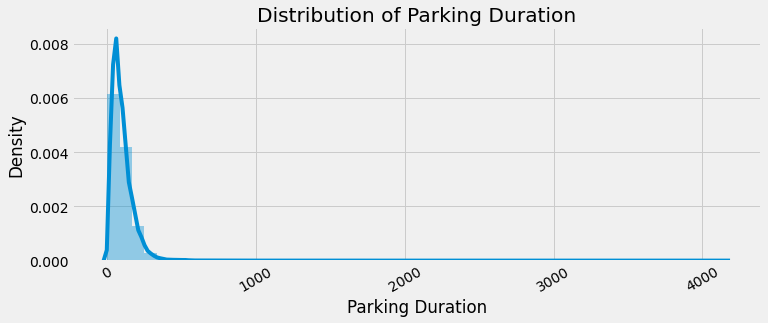

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (11, 4)
plt.style.use('fivethirtyeight')

plt.xticks(rotation=30)
sns.distplot(dataset1_filtered['Parking Duration'])
plt.title('Distribution of Parking Duration')
plt.show()

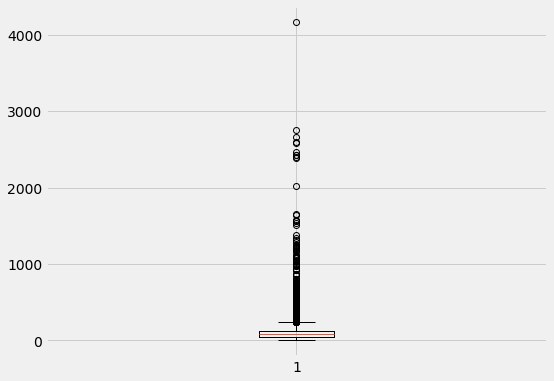

In [8]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.boxplot(dataset1_filtered["Parking Duration"])
plt.show()

In [9]:
grafton_mean = dataset1_filtered["Parking Duration"].mean()
grafton_std = dataset1_filtered["Parking Duration"].std()

print(f"rata-rata sampel Grafton West: {grafton_mean}")
print(f"standar deviasi sampel Grafton West: {grafton_std}")

rata-rata sampel Grafton West: 99.67682983251596
standar deviasi sampel Grafton West: 79.63327479029056


In [10]:
import numpy as np
from scipy.stats import t
import math

num_sample = dataset1_filtered["Parking Duration"].size

dof = num_sample - 1

p = 0.975

t_value = t.ppf(p, dof)

margin_of_error = t_value * grafton_std / math.sqrt(num_sample)

print('Batas selang tingkat kepercayaan adalah', 
      grafton_mean - margin_of_error, '< rataan_sampel <', grafton_mean + margin_of_error)

Batas selang tingkat kepercayaan adalah 99.14600506565371 < rataan_sampel < 100.20765459937822


In [11]:
import scipy.stats as stats

np.random.seed(10)

z_score = stats.norm.ppf(p)

margin_of_error = z_score * grafton_std / math.sqrt(num_sample)

print('Batas selang tingkat kepercayaan adalah', 
      grafton_mean - margin_of_error, '< rataan_sampel <', grafton_mean + margin_of_error)

Batas selang tingkat kepercayaan adalah 99.14601249716617 < rataan_sampel < 100.20764716786576


<h1> 2. QUEEN ANNE'S TERRACE </h1>

In [12]:
# data queen 
import pandas as pd

dataset2 = pd.read_csv("queen.csv")
dataset2.drop(columns=["Unnamed: 7"])

,Facility,Carpark,Device,Entries,Exits,Parking Duration,Time
0,Queen Anne,Queen Anne Terrace,QAT Entry 2,1,0,0,01/10/2018 06:06
1,Queen Anne,Queen Anne Terrace,QAT Entry 1,1,0,0,01/10/2018 06:31
2,Queen Anne,Queen Anne Terrace,QAT Entry 2,1,0,523,01/10/2018 06:31
3,Queen Anne,Queen Anne Terrace,QAT Entry 1,1,0,0,01/10/2018 06:37
4,Queen Anne,Queen Anne Terrace,QAT Entry 1,1,0,0,01/10/2018 06:48
...,...,...,...,...,...,...,...
218674,Queen Anne,Queen Anne Terrace,QAT Exit 1,0,1,138,31/12/2018 22:43
218675,Queen Anne,Queen Anne Terrace,QAT Exit 1,0,1,219,31/12/2018 22:50
218676,Queen Anne,Queen Anne Terrace,QAT Entry 2,1,0,0,31/12/2018 22:50
218677,Queen Anne,Queen Anne Terrace,QAT Exit 1,0,1,168,31/12/2018 23:16


In [13]:
for i in range(len(dataset2["Parking Duration"])):
    if "," in dataset2["Parking Duration"][i]:
        dataset2["Parking Duration"][i] = dataset2["Parking Duration"][i].replace(",", "")

<ipython-input-13-74098ccd9822>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2["Parking Duration"][i] = dataset2["Parking Duration"][i].replace(",", "")


In [14]:
dataset2["Parking Duration"] = dataset2["Parking Duration"].astype(float)
dataset2_filtered = dataset2[dataset2['Parking Duration'] > 0]

c:\users\darre\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


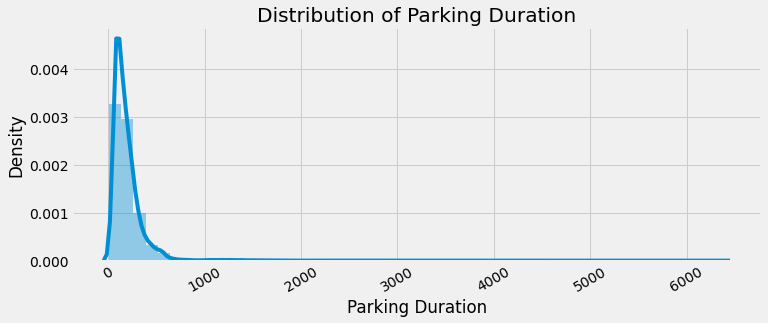

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (11, 4)
plt.style.use('fivethirtyeight')

plt.xticks(rotation=30)
sns.distplot(dataset2_filtered['Parking Duration'])
plt.title('Distribution of Parking Duration')
plt.show()

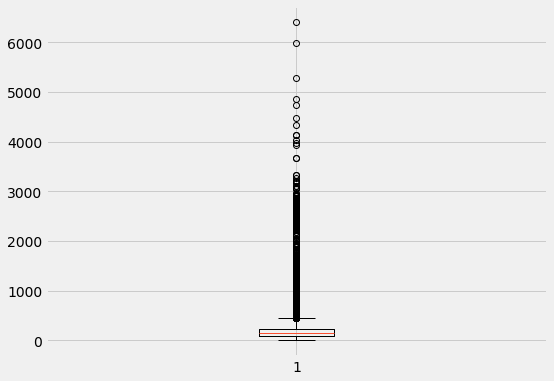

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 6)
plt.boxplot(dataset2_filtered["Parking Duration"])
plt.show()

In [17]:
queen_mean = dataset2_filtered["Parking Duration"].mean()
queen_std = dataset2_filtered["Parking Duration"].std()

print(f"rata-rata sampel Queen Anne's: {queen_mean}")
print(f"standar deviasi sampel Queen Anne's: {queen_std}")

rata-rata sampel Queen Anne's: 189.8537512219862
standar deviasi sampel Queen Anne's: 178.9229062042579


In [18]:
import numpy as np
from scipy.stats import t
import math

num_sample = dataset2_filtered["Parking Duration"].size

dof = num_sample - 1

p = 0.975

t_value = t.ppf(p, dof)

margin_of_error = t_value * queen_std / math.sqrt(num_sample)

print('Batas selang tingkat kepercayaan adalah', 
      queen_mean - margin_of_error, '< rataan_sampel <', queen_mean + margin_of_error)

Batas selang tingkat kepercayaan adalah 188.90299271164332 < rataan_sampel < 190.80450973232905


In [19]:
np.random.seed(10)

z_score = stats.norm.ppf(p)

margin_of_error = z_score * queen_std / math.sqrt(num_sample)

print('Batas selang tingkat kepercayaan lokasi Queen Annes adalah', 
      queen_mean - margin_of_error, '< rataan_sampel <', queen_mean + margin_of_error)

Batas selang tingkat kepercayaan lokasi Queen Annes adalah 188.90300117016068 < rataan_sampel < 190.8045012738117


<h1> 3. PARK STREET </h1>

In [20]:
import pandas as pd

dataset3 = pd.read_csv('park.csv')
dataset3.drop(columns=["Unnamed: 7"])
dataset3

,Facility,Carpark,Device,Entries,Exits,Parking Duration,Time,Unnamed: 7
0,ParkStreet,Park Street,Park St EX2,0,1,297,01/10/2018 03:30,NaN
1,ParkStreet,Park Street,Park St EX2,0,1,547,01/10/2018 04:38,NaN
2,ParkStreet,Park Street,Park St EN1A,1,0,6,01/10/2018 05:45,NaN
3,ParkStreet,Park Street,Park St EX2,0,1,6,01/10/2018 05:50,NaN
4,ParkStreet,Park Street,Park St EN1B,1,0,278,01/10/2018 07:52,NaN
...,...,...,...,...,...,...,...,...
236750,ParkStreet,Park Street,Park St EX2,0,1,360,31/12/2018 23:18,NaN
236751,ParkStreet,Park Street,Park St EX2,0,1,61,31/12/2018 23:30,NaN
236752,ParkStreet,Park Street,Park St EX2,0,1,185,31/12/2018 23:30,NaN
236753,ParkStreet,Park Street,Park St EX1,0,1,249,31/12/2018 23:33,NaN


In [21]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236755 entries, 0 to 236754
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Facility          236755 non-null  object 
 1   Carpark           236755 non-null  object 
 2   Device            236755 non-null  object 
 3   Entries           236755 non-null  int64  
 4   Exits             236755 non-null  int64  
 5   Parking Duration  236755 non-null  object 
 6   Time              236755 non-null  object 
 7   Unnamed: 7        0 non-null       float64
dtypes: float64(1), int64(2), object(5)
memory usage: 14.5+ MB


In [22]:
for i in range(len(dataset3["Parking Duration"])):
    if "," in dataset3["Parking Duration"][i]:
        dataset3["Parking Duration"][i] = dataset3["Parking Duration"][i].replace(",","")

<ipython-input-22-921b25a08a83>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset3["Parking Duration"][i] = dataset3["Parking Duration"][i].replace(",","")


In [23]:
dataset3['Parking Duration'] = dataset3['Parking Duration'].astype(float)
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236755 entries, 0 to 236754
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Facility          236755 non-null  object 
 1   Carpark           236755 non-null  object 
 2   Device            236755 non-null  object 
 3   Entries           236755 non-null  int64  
 4   Exits             236755 non-null  int64  
 5   Parking Duration  236755 non-null  float64
 6   Time              236755 non-null  object 
 7   Unnamed: 7        0 non-null       float64
dtypes: float64(2), int64(2), object(4)
memory usage: 14.5+ MB


In [24]:
dataset3_filtered = dataset3[dataset3['Parking Duration'] > 0]

c:\users\darre\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


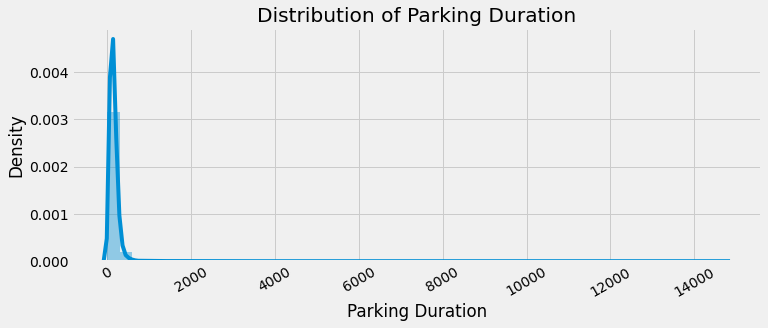

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (11, 4)
plt.style.use('fivethirtyeight')

plt.xticks(rotation=30)
sns.distplot(dataset3_filtered['Parking Duration'])
plt.title('Distribution of Parking Duration')
plt.show()

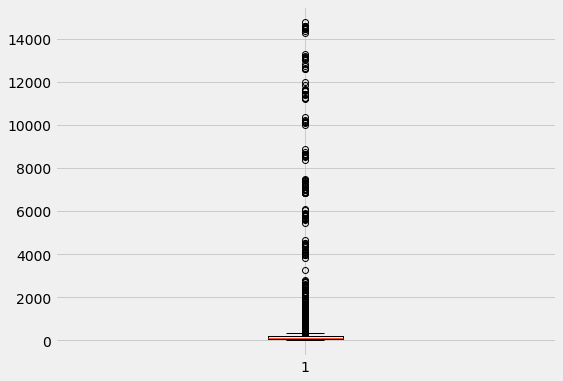

In [26]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.boxplot(dataset3_filtered["Parking Duration"])
plt.show()

In [27]:
park_mean = dataset3_filtered["Parking Duration"].mean()
park_std = dataset3_filtered["Parking Duration"].std()

print(f"rata-rata sampel Park Street: {park_mean}")
print(f"standar deviasi sampel Park Street: {park_std}")

rata-rata sampel Park Street: 161.98446375412342
standar deviasi sampel Park Street: 305.039091230532


In [28]:
import numpy as np
from scipy.stats import t
import math

num_sample = dataset3_filtered["Parking Duration"].size

dof = num_sample - 1

p = 0.975

t_value = t.ppf(p, dof)

margin_of_error = t_value * park_std / math.sqrt(num_sample)

print('Batas selang tingkat kepercayaan lokasi Park Street adalah', 
      park_mean - margin_of_error, '< rataan_sampel <', park_mean + margin_of_error)

Batas selang tingkat kepercayaan lokasi Park Street adalah 160.28860481590957 < rataan_sampel < 163.68032269233728


In [29]:
np.random.seed(10)

z_score = stats.norm.ppf(p)

margin_of_error = z_score * park_std / math.sqrt(num_sample)

print('Batas selang tingkat kepercayaan lokasi Park Street adalah', 
      park_mean - margin_of_error, '< rataan_sampel <', park_mean + margin_of_error)

Batas selang tingkat kepercayaan lokasi Park Street adalah 160.28862133070544 < rataan_sampel < 163.6803061775414


<h1>Perhitungan persentase mobil bermasalah (soal diskusi 2b)</h1>

In [30]:
# Dalam kasus ini, mobil tergolong "bermasalah" jika dan hanya jika durasi parkir lebih dari 8 jam atau 480 menit.

# Grafton West
x = dataset1_filtered
problem_data = x[x['Parking Duration'] > 480]
# Persentase mobil bermasalah
percentage_1 = (problem_data['Parking Duration'].size/x['Parking Duration'].size)*100

# Queen Anne's Terrace
x2 = dataset2_filtered
problem_data2 = x2[x2['Parking Duration'] > 480]
# Persentase mobil bermasalah
percentage_2 = (problem_data2['Parking Duration'].size/x2['Parking Duration'].size)*100

# Park Street
x3 = dataset3_filtered
problem_data3 = x3[x3['Parking Duration'] > 480]
# Persentase mobil bermasalah
percentage_3 = (problem_data3['Parking Duration'].size/x3['Parking Duration'].size)*100


percentage_1, percentage_2, percentage_3

(0.30882761173313594, 4.158795728009761, 1.4401802236704482)

**Estimasi persentase Grafton West**

In [31]:
num_sample = dataset1["Parking Duration"].size
mean = dataset1['Parking Duration'].mean()
std = dataset1['Parking Duration'].std()
dof = num_sample - 1

p = 0.975

t_value = t.ppf(p, dof)

margin_of_error = t_value * std / math.sqrt(num_sample)

In [32]:
a = ((mean - margin_of_error)*percentage_1)/mean
b = ((mean + margin_of_error)*percentage_1)/mean
print('Batas selang tingkat kepercayaan adalah', 
      a, '< persentase_mobil_bermasalah <', b)

Batas selang tingkat kepercayaan adalah 0.3066322061096842 < persentase_mobil_bermasalah < 0.31102301735658766


**Estimasi persentase Queen Anne's Terrace**

In [33]:
num_sample = dataset2["Parking Duration"].size
mean = dataset2['Parking Duration'].mean()
std = dataset2['Parking Duration'].std()
dof = num_sample - 1

p = 0.975

t_value = t.ppf(p, dof)

margin_of_error = t_value * std / math.sqrt(num_sample)

a = ((mean - margin_of_error)*percentage_2)/mean
b = ((mean + margin_of_error)*percentage_2)/mean
print('Batas selang tingkat kepercayaan adalah', 
      a, '< persentase_mobil_bermasalah <', b)

Batas selang tingkat kepercayaan adalah 4.133930563447091 < persentase_mobil_bermasalah < 4.183660892572432


**Estimasi persentase Park Street**

In [34]:
num_sample = dataset3["Parking Duration"].size
mean = dataset3['Parking Duration'].mean()
std = dataset3['Parking Duration'].std()
dof = num_sample - 1

p = 0.975

t_value = t.ppf(p, dof)

margin_of_error = t_value * std / math.sqrt(num_sample)

a = ((mean - margin_of_error)*percentage_3)/mean
b = ((mean + margin_of_error)*percentage_3)/mean
print('Batas selang tingkat kepercayaan adalah', 
      a, '< persentase_mobil_bermasalah <', b)

Batas selang tingkat kepercayaan adalah 1.4241245627001187 < persentase_mobil_bermasalah < 1.4562358846407777


<h1> ________________________________________________________________________________________ </h1>

<h1> PERTANYAAN DISKUSI NO 2C - Perhitungan Pendapatan </h1>

<h1> GRAFTON WEST </h1>

In [35]:
# Grafton
dataset1_filtered # dataset yg udah difilter.

grafton_money = 0

list_money_grafton = []
for i in dataset1_filtered['Parking Duration']:
    if i == 0 :
        list_money_grafton.append(0) # untuk masukin ke pendapatan
    elif i !=0:
        
        if (math.ceil(i/60)) < 8:
            grafton_money += math.ceil(i/60)*0.75
            list_money_grafton.append(math.ceil(i/60)*0.75) # untuk masukin ke pendapatan databasenya
        else :
            list_money_grafton.append(6) # untuk masukin ke database pendapatannya

total_income_grafton = sum(list_money_grafton)
IDR_grafton = total_income_grafton * 20079

print("Total pendapatan GRAFTON WEST:", total_income_grafton, "Poundsterling")
print("GBP to IDR:", IDR_grafton)

Total pendapatan GRAFTON WEST: 137971.5 Poundsterling
GBP to IDR: 2770329748.5


**PENDAPATAN GRAFTON WEST: Rp 2.769.004.535 (2.7 miliar)**

In [36]:
import pandas as pd

df = pd.DataFrame(dataset1_filtered)

df['Pendapatan'] = list_money_grafton

df

,Facility,Carpark,Device,Entries,Exits,Parking Duration,Time,Unnamed: 7,Pendapatan
0,GraftonWest,Grafton West,GW Exit 2,0,1,362.0,01/12/2018 01:04,NaN,5.25
1,GraftonWest,Grafton West,GW Exit 1,0,1,245.0,01/12/2018 01:29,NaN,3.75
3,GraftonWest,Grafton West,GW Exit 1,0,1,17.0,01/12/2018 07:37,NaN,0.75
28,GraftonWest,Grafton West,GW Exit 1,0,1,45.0,01/12/2018 08:28,NaN,0.75
48,GraftonWest,Grafton West,GW Exit 1,0,1,47.0,01/12/2018 08:46,NaN,0.75
...,...,...,...,...,...,...,...,...,...
172588,GraftonWest,Grafton West,GW Exit 1,0,1,127.0,31/12/2018 21:24,NaN,2.25
172589,GraftonWest,Grafton West,GW Exit 1,0,1,190.0,31/12/2018 21:43,NaN,3.00
172590,GraftonWest,Grafton West,GW Exit 1,0,1,288.0,31/12/2018 22:46,NaN,3.75
172591,GraftonWest,Grafton West,GW Exit 1,0,1,158.0,31/12/2018 22:59,NaN,2.25


c:\users\darre\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


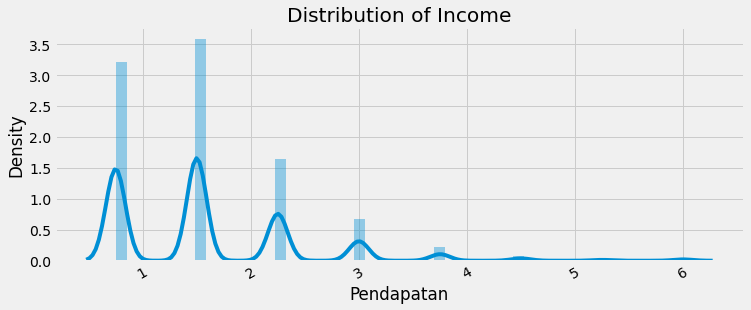

In [37]:
plt.rcParams['figure.figsize'] = (11, 4)
plt.style.use('fivethirtyeight')

plt.xticks(rotation=30)
sns.distplot(df['Pendapatan'])
plt.title('Distribution of Income')
plt.show()

In [38]:
grafton_mean_fil2 = dataset1_filtered["Pendapatan"].mean()
grafton_std_fil2 = dataset1_filtered["Pendapatan"].std()

import numpy as np
from scipy.stats import t
import math

num_sample = dataset1_filtered["Pendapatan"].size

dof = num_sample - 1

p = 0.975

t_value = t.ppf(p, dof)

margin_of_error = t_value * grafton_std_fil2 / math.sqrt(num_sample)

print('Batas selang tingkat kepercayaan adalah', 
      grafton_mean_fil2 - margin_of_error, '< rataan_sampel <', grafton_mean_fil2 + margin_of_error)

print("Standar deviasi pendapatan:", grafton_std_fil2)

Batas selang tingkat kepercayaan adalah 1.5899846550840724 < rataan_sampel < 1.6017313623120597
Standar deviasi pendapatan: 0.881108816848168


<h1> ________________________________________________________________________________________ </h1>

<h1> QUEEN ANNE'S TERRACE </h1>

In [39]:
# queen Anne's Terrace => data_queen_filtered
# QUEEN ANNE'S TERRACE

queen_money = 0

list_money_queen = []

for i in dataset2_filtered['Parking Duration']:
    if i == 0 :
        list_money_queen.append(0) # untuk masukin ke pendapatan
    elif i !=0:
        if math.ceil(i/60) < 8:
            queen_money += math.ceil(i/60)*0.75
            list_money_queen.append(math.ceil(i/60)*0.75) # untuk masukin ke pendapatan databasenya
        else :
            list_money_queen.append(6) # untuk masukin ke database pendapatannya

total_income_queen = sum(list_money_queen)
IDR_queen = total_income_queen * 20079

print("Total pendapatan QUEEN ANNE'S TERRACE:", total_income_queen, "Poundsterling")
print("GBP to IDR:", IDR_queen)

Total pendapatan QUEEN ANNE'S TERRACE: 351504.0 Poundsterling
GBP to IDR: 7057848816.0


**PENDAPATAN QUEEN ANNE'S TERRACE: Rp 7.056.162.180 (7 miliar)**

In [40]:
import pandas as pd

df = pd.DataFrame(dataset2_filtered)

df['Pendapatan'] = list_money_queen

df

,Facility,Carpark,Device,Entries,Exits,Parking Duration,Time,Unnamed: 7,Pendapatan
2,Queen Anne,Queen Anne Terrace,QAT Entry 2,1,0,523.0,01/10/2018 06:31,NaN,6.00
5,Queen Anne,Queen Anne Terrace,QAT Entry 2,1,0,59.0,01/10/2018 07:23,NaN,0.75
6,Queen Anne,Queen Anne Terrace,QAT Entry 2,1,0,699.0,01/10/2018 07:25,NaN,6.00
7,Queen Anne,Queen Anne Terrace,QAT Entry 2,1,0,558.0,01/10/2018 07:33,NaN,6.00
8,Queen Anne,Queen Anne Terrace,QAT Entry 1,1,0,578.0,01/10/2018 07:35,NaN,6.00
...,...,...,...,...,...,...,...,...,...
218672,Queen Anne,Queen Anne Terrace,QAT Exit 2,0,1,210.0,31/12/2018 22:35,NaN,3.00
218673,Queen Anne,Queen Anne Terrace,QAT Exit 1,0,1,137.0,31/12/2018 22:42,NaN,2.25
218674,Queen Anne,Queen Anne Terrace,QAT Exit 1,0,1,138.0,31/12/2018 22:43,NaN,2.25
218675,Queen Anne,Queen Anne Terrace,QAT Exit 1,0,1,219.0,31/12/2018 22:50,NaN,3.00


c:\users\darre\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


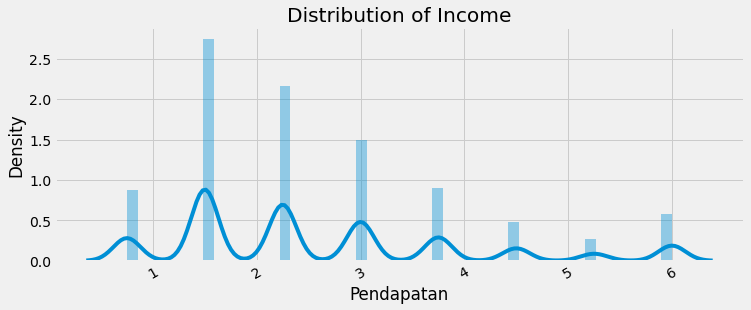

In [41]:
plt.rcParams['figure.figsize'] = (11, 4)
plt.style.use('fivethirtyeight')

plt.xticks(rotation=30)
sns.distplot(dataset2_filtered['Pendapatan'])
plt.title('Distribution of Income')
plt.show()

In [42]:
queen_mean_fil2 = dataset2_filtered["Pendapatan"].mean()
queen_std_fil2 = dataset2_filtered["Pendapatan"].std()

import numpy as np
from scipy.stats import t
import math

num_sample = dataset2_filtered["Pendapatan"].size

dof = num_sample - 1

p = 0.975

t_value = t.ppf(p, dof)

margin_of_error = t_value * queen_std_fil2 / math.sqrt(num_sample)

print('Batas selang tingkat kepercayaan adalah', 
      queen_mean_fil2 - margin_of_error, '< rataan_sampel <', queen_mean_fil2 + margin_of_error)

print('Standar deviasi pendapatan:', queen_std_fil2)

Batas selang tingkat kepercayaan adalah 2.5762744402764204 < rataan_sampel < 2.591040277215072
Standar deviasi pendapatan: 1.3893888031824932


<h1> ________________________________________________________________________________________ </h1>

<h1> PARK STREET </h1>

In [43]:
# Park Street
parkstreet_money = 0

list_money_parkstreet = []

for i in dataset3_filtered['Parking Duration']:
    if i == 0 :
        list_money_parkstreet.append(0) # untuk masukin ke pendapatan
    elif i !=0:
        if math.ceil(i/60) < 8:
            parkstreet_money += math.ceil(i/60)*0.75
            list_money_parkstreet.append(math.ceil(i/60)*0.75) # untuk masukin ke pendapatan databasenya
        else :
            list_money_parkstreet.append(6) # untuk masukin ke database pendapatannya

total_income_parkstreet = sum(list_money_parkstreet)
IDR_parkstreet = total_income_parkstreet * 20079

print("Total pendapatan PARK STREET:", total_income_parkstreet, "Poundsterling")
print("GBP to IDR:", IDR_parkstreet)

Total pendapatan PARK STREET: 278548.5 Poundsterling
GBP to IDR: 5592975331.5


**PENDAPATAN PARK STREET: Rp 5.575.386.128 (5.5 miliar)**

In [44]:
import pandas as pd

df = pd.DataFrame(dataset3_filtered)

df['Pendapatan'] = list_money_parkstreet

df

,Facility,Carpark,Device,Entries,Exits,Parking Duration,Time,Unnamed: 7,Pendapatan
0,ParkStreet,Park Street,Park St EX2,0,1,297.0,01/10/2018 03:30,NaN,3.75
1,ParkStreet,Park Street,Park St EX2,0,1,547.0,01/10/2018 04:38,NaN,6.00
2,ParkStreet,Park Street,Park St EN1A,1,0,6.0,01/10/2018 05:45,NaN,0.75
3,ParkStreet,Park Street,Park St EX2,0,1,6.0,01/10/2018 05:50,NaN,0.75
4,ParkStreet,Park Street,Park St EN1B,1,0,278.0,01/10/2018 07:52,NaN,3.75
...,...,...,...,...,...,...,...,...,...
236749,ParkStreet,Park Street,Park St EX1,0,1,154.0,31/12/2018 23:04,NaN,2.25
236750,ParkStreet,Park Street,Park St EX2,0,1,360.0,31/12/2018 23:18,NaN,4.50
236751,ParkStreet,Park Street,Park St EX2,0,1,61.0,31/12/2018 23:30,NaN,1.50
236752,ParkStreet,Park Street,Park St EX2,0,1,185.0,31/12/2018 23:30,NaN,3.00


c:\users\darre\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


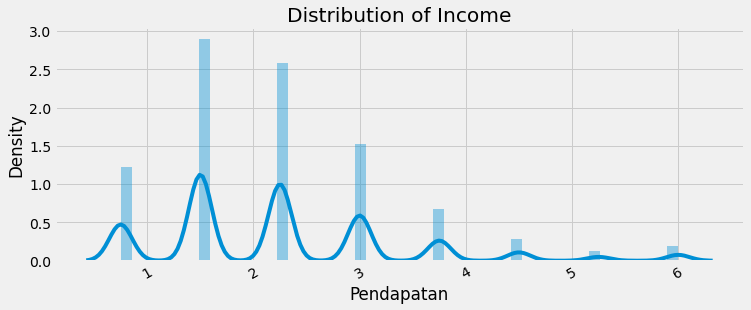

In [45]:
plt.rcParams['figure.figsize'] = (11, 4)
plt.style.use('fivethirtyeight')

plt.xticks(rotation=30)
sns.distplot(dataset3_filtered['Pendapatan'])
plt.title('Distribution of Income')
plt.show()

In [46]:
park_mean_fil2 = dataset3_filtered["Pendapatan"].mean()
park_std_fil2 = dataset3_filtered["Pendapatan"].std()

import numpy as np
from scipy.stats import t
import math

num_sample = dataset3_filtered["Pendapatan"].size

dof = num_sample - 1

p = 0.975

t_value = t.ppf(p, dof)

margin_of_error = t_value * park_std_fil2 / math.sqrt(num_sample)

print('Batas selang tingkat kepercayaan adalah', 
      park_mean_fil2 - margin_of_error, '< rataan_sampel <', park_mean_fil2 + margin_of_error)

print("Standar Deviasi pendapatan:", park_std_fil2)

Batas selang tingkat kepercayaan adalah 2.2348387976908377 < rataan_sampel < 2.2473962976507025
Standar Deviasi pendapatan: 1.1293770636132807
